In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sympy import Matrix, MatrixBase

# Lower–Upper Decomposition (LU)

\begin{equation}
A = L * U
\end{equation}

## Scipy (Numpy Linalg doesn't have LU decomposition!)

### NxN Matrix

### Perform Permutation P @ L

In [2]:
A = np.matrix([[2, 1, 1], [6, 6, 4], [10, 11, 11]])

In [3]:
L, U = scipy.linalg.lu(A, permute_l=True)

In [4]:
np.allclose(A, L @ U)

True

In [5]:
L @ U

array([[ 2.,  1.,  1.],
       [ 6.,  6.,  4.],
       [10., 11., 11.]])

### Saving Permutation Matrix

In [6]:
B = np.matrix([[0, 0, 7], [12, 3, 4], [4, 5, 7]])

In [7]:
P, L, U = scipy.linalg.lu(B)

In [8]:
np.allclose(B, P @ L @ U)

True

In [9]:
B == P @ L @ U 

matrix([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

### NxM Matrix

In [10]:
A = np.matrix([[1, 2, 3, 4], [1, 4, 9, 16], [1, 8, 27, 64]])

In [11]:
A

matrix([[ 1,  2,  3,  4],
        [ 1,  4,  9, 16],
        [ 1,  8, 27, 64]])

In [12]:
P, L, U = scipy.linalg.lu(A)

In [13]:
A == P @ L @ U

matrix([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

## Sympy

### NxN Matrix

In [14]:
C = Matrix([[2, 1, 1], [6, 6, 4], [10, 11, 11]])
D = Matrix([[0, 0, 7], [12, 3, 4], [4, 5, 7]])

In [15]:
C

Matrix([
[ 2,  1,  1],
[ 6,  6,  4],
[10, 11, 11]])

In [16]:
lu_matrices_c = C.LUdecomposition()

In [17]:
L, U = lu_matrices_c[0], lu_matrices_c[1]

In [18]:
C.equals(L @ U)

True

In [19]:
L @ U 

Matrix([
[ 2,  1,  1],
[ 6,  6,  4],
[10, 11, 11]])

In [20]:
lu_matrices_d = D.LUdecomposition()

In [21]:
L, U, perm = lu_matrices_d

In [22]:
(L*U).permuteBkwd(perm)

Matrix([
[ 0, 0, 7],
[12, 3, 4],
[ 4, 5, 7]])

### NxM Matrix

In [23]:
C = Matrix([[1, 2, 3, 4], [1, 4, 9, 16], [1, 8, 27, 64]])

In [24]:
C

Matrix([
[1, 2,  3,  4],
[1, 4,  9, 16],
[1, 8, 27, 64]])

In [25]:
L, U, perm  = C.LUdecomposition()

In [26]:
C.equals(L @ U)

True

---

# QR Decomposition
\begin{equation}
A = Q * R
\end{equation}

## Numpy

In [27]:
A = np.matrix([[3, -6, -1], [4, 2, 2], [12, 16, 5]])

In [28]:
A

matrix([[ 3, -6, -1],
        [ 4,  2,  2],
        [12, 16,  5]])

In [29]:
Q, R = np.linalg.qr(A)

In [30]:
np.allclose(A, np.matmul(Q, R))

True

## Sympy

In [31]:
C = Matrix([[3, -6, -1], [4, 2, 2], [12, 16, 5]])

In [32]:
Q, R = C.QRdecomposition()

In [33]:
Q @ R

Matrix([
[ 3, -6, -1],
[ 4,  2,  2],
[12, 16,  5]])

---

# Singular Value Decomposition (SVD)

\begin{equation}
A=U∗E∗V^T
\end{equation}

## Numpy

In [34]:
A = np.matrix([[3, -6, 2], [4, 1, 2], [12, 16, 5]])

In [35]:
U, Sigma, VT = np.linalg.svd(A)

In [36]:
U

matrix([[ 0.11963437, -0.91311004, -0.38976618],
        [-0.16839933, -0.40556009,  0.89842233],
        [-0.97843205, -0.04184582, -0.20228605]])

In [37]:
# Singular Values
Sigma 

array([2.10677436e+01, 7.15193224e+00, 6.63679776e-03])

In [38]:
VT

matrix([[-0.57224348, -0.78513953, -0.23684028],
        [-0.68005683,  0.6157171 , -0.39801403],
        [-0.45832316,  0.06669609,  0.88627959]])

In [39]:
# Constructing E (diagonal matrix with singular values)
E = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(E, Sigma)

In [40]:
np.allclose(A, np.dot(U, (E*VT)))

True

In [41]:
np.dot(U, (E*VT))

matrix([[ 3., -6.,  2.],
        [ 4.,  1.,  2.],
        [12., 16.,  5.]])

## Sympy

In [42]:
A = Matrix([[4, 0], [3, -5]])

In [43]:
A

Matrix([
[4,  0],
[3, -5]])

In [44]:
U, S, V = A.singular_value_decomposition()

In [45]:
A == U * S * V.T

True

In [46]:
U * S * V.T

Matrix([
[4,  0],
[3, -5]])

---

# Principle Component Analysis - PCA

In [47]:
matrix = np.random.rand(250, 80)

In [48]:
matrix.shape

(250, 80)

In [49]:
mean_of_features = np.mean(matrix, axis=0)
std_of_features = np.std(matrix, axis=0)

In [50]:
standardised_matrix = (matrix - mean_of_features)/std_of_features

In [51]:
standardised_matrix

array([[ 0.22755986, -1.72664113, -0.6182929 , ..., -1.00452978,
         1.37801232, -0.58196513],
       [ 0.50473156,  1.63603863, -1.43503703, ..., -0.15111865,
        -1.44796654,  0.54425096],
       [ 1.20487904, -0.89050144, -1.16963954, ...,  0.4294078 ,
        -0.02223275, -1.18834588],
       ...,
       [ 0.22843172,  0.25282783, -1.29520022, ..., -1.3291559 ,
        -0.93883843, -1.17718297],
       [-0.07711195, -0.77766946,  1.24329919, ..., -0.17901842,
         0.3263095 , -1.3265689 ],
       [-0.14758569,  0.32454194, -0.63373847, ...,  1.0943347 ,
         0.59550219, -0.95707316]])

In [52]:
pca = PCA(n_components=30)

In [53]:
pca_matrix = pca.fit_transform(standardised_matrix)

In [54]:
print(pca.explained_variance_ratio_)

[0.02771456 0.02717916 0.02617702 0.02563321 0.02514003 0.02475338
 0.02416018 0.02368862 0.02278521 0.02226362 0.0219928  0.02113594
 0.02079172 0.0204305  0.01961094 0.01939172 0.0191888  0.01899539
 0.01832262 0.01799773 0.01750669 0.01735735 0.01689761 0.01616418
 0.01591856 0.01589174 0.01516589 0.01486616 0.01439296 0.01423757]


In [55]:
np.sum(pca.explained_variance_ratio_) ## 60 percent explained (variation)

0.6057518465822933

In [56]:
print(pca.singular_values_)

[23.54339042 23.31487008 22.88100599 22.64209095 22.42321632 22.25011645
 21.98189257 21.76631154 21.34723156 21.10147808 20.9727441  20.56012748
 20.39201893 20.21410483 19.8045122  19.69351093 19.59020151 19.49122415
 19.14294673 18.97247019 18.71185993 18.63187896 18.38347549 17.98008652
 17.84295752 17.82792088 17.41601901 17.24306173 16.96641586 16.87457618]


In [57]:
pca_matrix

array([[ 0.30554438, -0.27971739, -0.50386714, ...,  0.0524881 ,
        -0.21135596, -0.39247151],
       [ 0.97497836,  0.54787743, -0.21078481, ...,  0.65168918,
         1.46420204, -0.48374135],
       [-0.43860251,  1.00970079, -0.16956427, ...,  0.01611313,
        -0.81512576, -0.14236861],
       ...,
       [ 1.37230131,  1.60979946, -2.45254219, ...,  1.16572107,
         1.03379113, -0.63998961],
       [ 2.30004532, -3.52730526,  1.94337889, ..., -0.48868393,
        -0.92059504,  0.2760724 ],
       [-0.01073332,  0.13379947,  1.43629843, ..., -1.17745815,
         1.29124963,  0.03556223]])

In [58]:
pca_matrix[0]

array([ 0.30554438, -0.27971739, -0.50386714, -0.08828095, -1.63250548,
        0.06434486,  1.57850027,  1.70624214, -3.42266971,  1.38259878,
        0.53227019, -0.10162379,  0.1529697 ,  0.73003752, -1.38161035,
       -1.26368634,  0.2389818 , -1.10811347, -1.85447864,  0.0291801 ,
        1.77063018, -0.64690311,  1.12909392,  0.44652524, -0.58111313,
        0.04110096, -0.94360731,  0.0524881 , -0.21135596, -0.39247151])

In [59]:
pca_matrix.shape

(250, 30)

## Calculate manually with Numpy

### 1. Standardise to 0 - already done

In [60]:
standardised_matrix.shape

(250, 80)

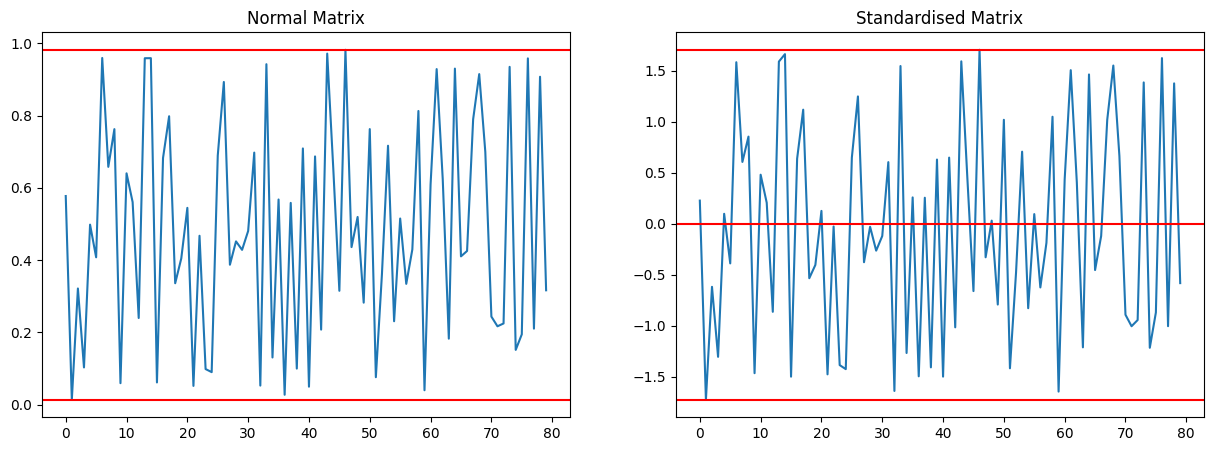

In [61]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

ax[0].plot(matrix[0])
ax[0].axhline(np.min(matrix[0]), color="r")
ax[0].axhline(np.max(matrix[0]), color="r")

ax[1].plot(standardised_matrix[0])
ax[1].axhline(np.min(standardised_matrix[0]), color="r")
ax[1].axhline(0, color="r")
ax[1].axhline(np.max(standardised_matrix[0]), color="r")

ax[0].set_title("Normal Matrix")
ax[1].set_title("Standardised Matrix")
plt.show()

## CENTRALIZE MATRIX TO 0

### 2. Calculate the covariance matrix for the whole dataset

In [62]:
covariance_matrix = np.cov(standardised_matrix, rowvar=False) ## rowvar=False, sicne columns are the variables in this example

In [63]:
covariance_matrix.shape

(80, 80)

In [64]:
covariance_matrix

array([[ 1.00401606, -0.08001247,  0.13220015, ...,  0.01854646,
        -0.04331627, -0.14657787],
       [-0.08001247,  1.00401606,  0.10236857, ...,  0.14671479,
         0.03349075,  0.13291776],
       [ 0.13220015,  0.10236857,  1.00401606, ..., -0.07673747,
         0.0037704 , -0.04893073],
       ...,
       [ 0.01854646,  0.14671479, -0.07673747, ...,  1.00401606,
         0.09738132,  0.07962754],
       [-0.04331627,  0.03349075,  0.0037704 , ...,  0.09738132,
         1.00401606,  0.0868045 ],
       [-0.14657787,  0.13291776, -0.04893073, ...,  0.07962754,
         0.0868045 ,  1.00401606]])

### 3. Calculate eigenvalues and eigen vectors.
- det(A-λI) = 0

In [65]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [66]:
eigenvalues

array([2.22606921, 2.18306493, 2.10257203, 2.0588927 , 2.01927964,
       1.98822362, 1.94057671, 1.90270007, 1.83013773, 1.78824248,
       1.76648994, 1.69766603, 1.67001782, 1.64100415, 1.57517552,
       1.55756776, 1.52573421, 1.54126906, 1.47169642, 1.4456009 ,
       1.40615945, 1.39416431, 0.20619112, 1.35723763, 0.22468721,
       0.23845929, 0.2564228 , 1.29832735, 1.27859893, 1.27644483,
       0.27354892, 1.21814345, 1.19406899, 0.29413251, 0.30935156,
       0.33372563, 0.34087986, 1.15606131, 0.36371054, 1.1435796 ,
       1.13757757, 1.09638219, 0.36867296, 0.39151122, 0.40306365,
       1.0626451 , 0.4148491 , 1.0733013 , 0.43453332, 1.0184491 ,
       1.00936515, 0.44857132, 0.48659594, 0.47313815, 0.47024033,
       0.96750822, 0.51259714, 0.91369401, 0.93061082, 0.8833353 ,
       0.86275626, 0.993469  , 0.54991293, 0.82924517, 0.5840384 ,
       0.56955237, 0.69104786, 0.78694326, 0.71987734, 0.60451711,
       0.6607175 , 0.64022405, 0.76132798, 0.7517034 , 0.65222

In [67]:
eigenvectors

array([[-0.14386483,  0.04856929, -0.18068585, ...,  0.01572071,
        -0.00406299,  0.00215781],
       [ 0.15061405, -0.16274114, -0.06985928, ...,  0.17274021,
         0.09520972,  0.04634287],
       [-0.09982039, -0.19960779, -0.11486757, ..., -0.05993573,
         0.23333349, -0.01649947],
       ...,
       [ 0.14964196, -0.14833617, -0.18475433, ..., -0.22261343,
         0.09603231,  0.15413505],
       [ 0.15613542, -0.07206568,  0.01946134, ..., -0.09668031,
         0.02446478, -0.09316864],
       [ 0.10643075,  0.03672593,  0.02306239, ..., -0.02450084,
        -0.06573381,  0.19413287]])

In [68]:
descending_sort = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[descending_sort] ##sorting = descending
eigenvectors = eigenvectors[:, descending_sort] 

### 4. Pick Top 30 EigenVector

In [69]:
top_eigen_vectors = eigenvectors[:, :30]

In [70]:
top_eigen_vectors.shape

(80, 30)

### 5. Transform the standardised matrix.
Standardised matrix * top k eigenvectors = PCA Transformed Data

In [71]:
pca_matrix[0]

array([ 0.30554438, -0.27971739, -0.50386714, -0.08828095, -1.63250548,
        0.06434486,  1.57850027,  1.70624214, -3.42266971,  1.38259878,
        0.53227019, -0.10162379,  0.1529697 ,  0.73003752, -1.38161035,
       -1.26368634,  0.2389818 , -1.10811347, -1.85447864,  0.0291801 ,
        1.77063018, -0.64690311,  1.12909392,  0.44652524, -0.58111313,
        0.04110096, -0.94360731,  0.0524881 , -0.21135596, -0.39247151])

In [72]:
(standardised_matrix @ top_eigen_vectors)[0]

array([-0.30554438, -0.27971739,  0.50386714,  0.08828095, -1.63250548,
       -0.06434486, -1.57850027, -1.70624214, -3.42266971,  1.38259878,
        0.53227019,  0.10162379, -0.1529697 , -0.73003752,  1.38161035,
        1.26368634, -0.2389818 , -1.10811347,  1.85447864, -0.0291801 ,
       -1.77063018,  0.64690311,  1.12909392, -0.44652524, -0.58111313,
       -0.04110096,  0.94360731,  0.0524881 ,  0.21135596, -0.39247151])